<h1><center>STAT-542 HW3</center></h1>
Sharvi Tomar (stomar2)

## About HW3

In the first question, we will use a simulation study to confirm the theoretical analysis we developed during the lecture. In the second question, we will practice several linear model selection techniques such as AIC, BIC, and best subset selection. However, some difficulties are at the data processing part, in which we use the Bitcoin data from Kaggle. This is essentially a time-series dataset, and we use the information in previous days to predict the price in a future day. Make sure that you process the data correctly to fit this task.

## Question 1 [50 Points] A Simulation Study

Let's use a simulation study to confirm the bias-variance trade-off of linear regressions. Consider the following model. 

$$Y = \sum_j^p 0.8^j \times X_j + \epsilon$$

All the covariates and the error term follow i.i.d. standard Gaussian distribution. The true model involves all the variables; however, larger indexes do not significantly contribute to the variation. Hence, there could be a benefit in using a smaller subset for prediction purposes. Let's confirm that with a simulation study. 

  - Generate 100 samples of covariates $X$ with $p=30$ by the following code.

In [653]:
import random
random.seed(542)
n = 100
p = 30
b=[]
for i in range(1,p+1): 
    b.append(0.8**i)

In [654]:
import numpy as np
X = np.random.normal(0, 1, size=(n, p))
Ytrue = np.matmul(X, b)

In [655]:
print(X.shape)
print(Ytrue.shape)

(100, 30)
(100,)


  - Then the study essentially **repeats** the following steps 100 times. Begin with another fixed random seed before your loop.
    - Using the fixed covariates $X$, generate 100 training outcomes $Y_{train}$ and 100 testing outcomes $Y_test$ independently.
    - Consider using only the first $j$ variables to fit the linear regression (**NO intercept term**). Let $j$ ranges from 1 to 30. Calculate and record the corresponding prediction error by comparing your prediction with the outcomes for testing data. 

**Without running the simulation**, for each $j$ value, we also have the theoretical decomposition of the testing error based on the lecture. Suppose you know the true model, covariates $X$ and the distribution of random noise.

  a) [15 pts]  Please calculate the bias^2 , variance (of the prediction) and testing error for each $j$ based on the theoretical formulas. Plot the 3 lines on the same figure,  using the `number of variables` as the x-axis and `bias^2`, `variance`, `theoretical testing error`  as the y-axis. Label each line.
   - $Bias^2 =  \frac{1}{n} \| E(Y_{pred} - Y_{true}) \|^2$, where $Y$ is a $n \times 1$ vector.
   - $Var =  \frac{1}{n} E \|(Y_{pred} - E(Y_{pred}) \|^2$.

In [656]:
from numpy.linalg import inv

Y_pred=[0]*30
bias_sq=[0]*30
var=[0]*30
theoretical_testing_error=[0]*30

for j in range(29,-1,-1):
    p=30-j
    ind=29-j
    ## Set of Covariates for each value of j
    X_new = X[:,:p]
    ## Hat matrix
    H=np.matmul(X_new,np.matmul(inv(np.matmul(np.transpose(X_new),X_new)),np.transpose(X_new)))
    ## Computing Y_pred
    Y_pred[ind]=np.matmul(H,Ytrue)
    ## Computing bias square
    bias_sq[ind]=np.mean(np.square(Y_pred[ind]-Ytrue))
    ## Computing variance
    var[ind]=(p)/30
    ## Computing theoretical_testing_error
    theoretical_testing_error[ind]=(1+var[ind]+bias_sq[ind])

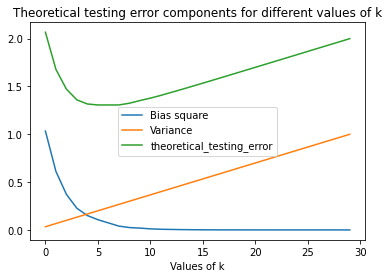

In [657]:
# Plotting 
from matplotlib import pyplot as plt
plt.plot(bias_sq)
plt.plot(var)
plt.plot(theoretical_testing_error)
plt.legend(["Bias square", "Variance","theoretical_testing_error"])
plt.title('Theoretical testing error components for different values of k')
plt.xlabel('Values of k')
plt.show()

 b) [5 pts] Report the theoretical testing error with $p = 30$, $\frac{1}{n}E \|Y_{test} - Y_{pred} \|^2$.

In [658]:
print("The theoretical testing error with 𝑝=30 is: ",theoretical_testing_error[29])

The theoretical testing error with 𝑝=30 is:  2.0


**After finishing the simulation**:

  c)  [20 pts]  Perform the simulation. Report the averaged (empirical) prediction error with $p = 30$. Note that 100 times simulation approximates the $E$ operation. Plot `pred err` in the **same figure** of question a. Label your line. Does your empirical testing error match our theoretical analysis? Comment on your findings.

In [659]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Number of simulations
nsim=100

y_pred=[[0]*30 for i in range(100)]
prediction_error=[[0]*30 for i in range(100)]
avg_mse=[0]*30


for j in range(30):
    
    for i in range(nsim):
        ## Generating Y_train
        random.seed(i)
        Y_train=np.matmul(X, b)+np.random.normal(0, 1, 100)
    
        ## Generating Y_est
        random.seed(i+1)
        Y_test= np.matmul(X, b)+np.random.normal(0, 1, 100)
        
        # Linear Regression Model with no intercept and j covariates
        model = LinearRegression(fit_intercept=False).fit(X[:,:j+1], Y_train)
        
        # Model Predictions
        y_pred[i][j]=model.predict(X[:,:j+1])
    
        # Calculating Prediction Error(MSE)
        prediction_error[i][j]=mean_squared_error(y_pred[i][j],Y_test)

    # Calculating average MSE for all simulation for a particular number of variables in Linear Model i.e. j
    avg_mse[j]=np.mean(prediction_error[:][j])

print("The averaged (empirical) prediction error with 𝑝=30 is: ", avg_mse[29])    

The averaged (empirical) prediction error with 𝑝=30 is:  1.2848837910919098


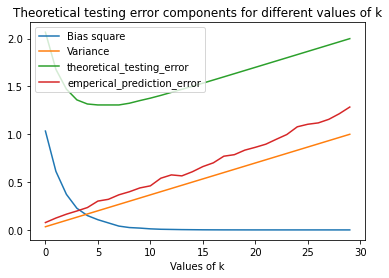

In [660]:
# Plotting 
from matplotlib import pyplot as plt
plt.plot(bias_sq)
plt.plot(var)
plt.plot(theoretical_testing_error)
plt.plot(avg_mse)
plt.legend(["Bias square", "Variance","theoretical_testing_error","emperical_prediction_error"])
plt.title('Theoretical testing error components for different values of k')
plt.xlabel('Values of k')
plt.show()

### Findings:

Theoretical and empirical error follow the same trend across increasing values of k

d)  [10 pts]  Evaluate the bias^2 for model $p=5$ without theoretical formulas. You can still assume you know the true outcomes while using the average results to approximate the $E$ operation. Compare the empirical value with the theoretical one.

In [661]:
empirical_error_5=np.mean(np.square(y_pred[0][5]-Y_test))
print("The empirical value of testing error for 5 covariates is: ", empirical_error_5)
print("The theoretical value of testing error for 5 covariates is: ",theoretical_testing_error[4])

The empirical value of testing error for 5 covariates is:  1.068737970181514
The theoretical value of testing error for 5 covariates is:  1.3167320439457666


## Question 2 [50 Points] Bitcoin price prediction

For this question, we will use the [Bitcoin data]() provided on the course website. The data were posted originally on Kaggle ([link](https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=bitcoin_cash_price.csv)). Make sure that you read relevant information from the Kaggle website. Our data is the `bitcoin_dataset.csv` file. You should use a training/testing split such that your training data is constructed using only information up to 12/31/2016, and your testing data is constructed using only information starting from 01/01/2017. The goal of our analysis is to predict the `btc_market_price`. Since this is longitudinal data, we will use the information from previous days to predict the market price at a future day. In particular, on each calendar day (say, day 1), we use the information from three days onward (days 1, 2, and 3) to predict the market price on the 7th day. 

Hence you need to first reconstruct the data properly to fit this purpose. This is mainly to put the outcome (of day 7) and the covariates (of the previous days) into the same row. Note that you may face missing data, categorical predictors, outliers, scaling issues, computational issues, and maybe others for this question. Use your best judgment to deal with them. There is no general ``best answer''. Hence the grading will be based on whether you provided reasoning for your decision and whether you carried out the analysis correctly.

a.  [25 Points] Data Construction. Data pre-processing is usually the most time-consuming and difficult part of an analysis. We will use this example as a practice. Construct your data appropriately such that further analysis can be performed. Make sure that you consider the following:

    * The data is appropriate for our analysis goal: each row contains the outcome on the seventh day and the covariates based on the first three days. The covariates are not limited to the price.
    * Missing data is addressed (you can remove variables, remove observations, impute values or propose your own method)
    * You may process the covariates and/or outcome by considering centering, scaling, transformation, removing outliers, etc. However, these are your choice. 
  
For each of the above tasks, make sure that you **clearly document your choice**. In the end, provide a summary table/figure of your data. You can consider using boxplots, quantiles, histograms, or any method that is easy for readers to understand. You are required to pick at least one method to present. 

In [662]:
# Loading the data
import pandas as pd
bitcoin = pd.read_csv("bitcoin.csv")

### A. Creating Covariates

In [663]:
# Creating 3 covariates based on the first three days of 'btc_market_price'
bitcoin['PastDay3'] = bitcoin['btc_market_price'].shift(4)
bitcoin['PastDay2'] = bitcoin['btc_market_price'].shift(5)
bitcoin['PastDay1'] = bitcoin['btc_market_price'].shift(6)

### B. Missing data handling

In [664]:
bitcoin.isnull().sum().sort_values(ascending=False)[:5] 

btc_trade_volume                    21
PastDay1                             6
PastDay2                             5
PastDay3                             4
btc_cost_per_transaction_percent     0
dtype: int64

We can check the distributions of the variables with missing values before and after imputing the missing values. In case, the distributions is similar we can go ahead with the missing data imputing method.

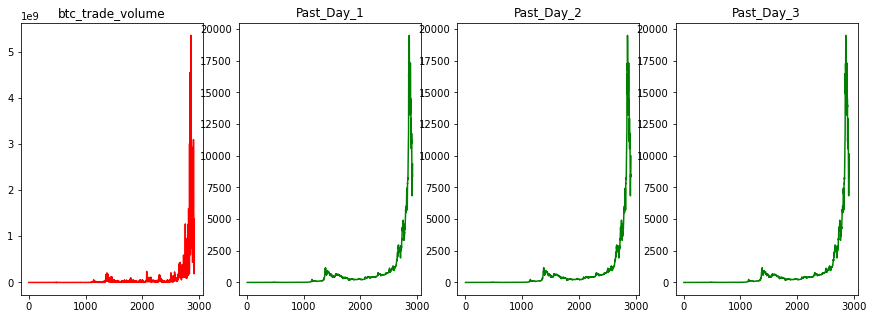

In [665]:
import matplotlib.pyplot as plt

# Distribution plot before imputing missing values
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
bitcoin.btc_trade_volume.plot(color='red')
plt.title('btc_trade_volume')
plt.subplot(1, 4, 2)
bitcoin.PastDay1.plot(color='green')
plt.title('Past_Day_1')
plt.subplot(1, 4, 3)
bitcoin.PastDay2.plot(color='green')
plt.title('Past_Day_2')
plt.subplot(1, 4, 4)
bitcoin.PastDay3.plot(color='green')
plt.title('Past_Day_3')
plt.show()

#### Filling the missing values by using the value of last valid observation.


Reasoning: It is reasonable to assume that the bitcoin trading volume and bitcoin trading price for any day will be very similar to the volume traded and price around that timeframe. By making use of this assumption, I have replaced the missing values by last closest valid 'btc_trade_volume', 'Past_Day_3', 'Past_Day_2', 'Past_Day_1' value with 'bfill'

In [666]:
# Used next valid observation to fill gap for btc_trade_volume, Past_Day_3, Past_Day_2, Past_Day_1
bitcoin.fillna(method='bfill', inplace=True)

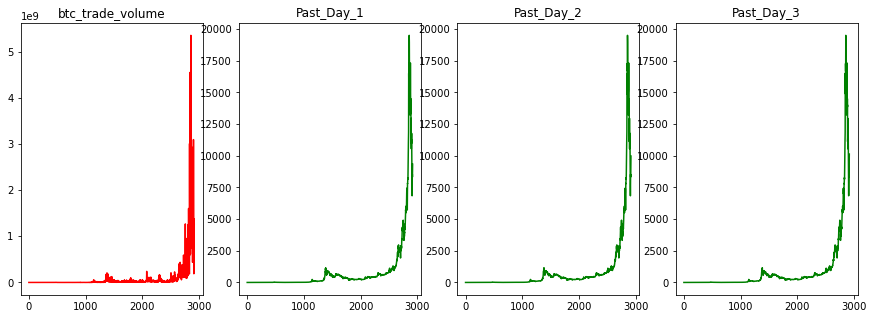

In [667]:
# Distribution plot after imputing missing values
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
bitcoin.btc_trade_volume.plot(color='red')
plt.title('btc_trade_volume')
plt.subplot(1, 4, 2)
bitcoin.PastDay1.plot(color='green')
plt.title('Past_Day_1')
plt.subplot(1, 4, 3)
bitcoin.PastDay2.plot(color='green')
plt.title('Past_Day_2')
plt.subplot(1, 4, 4)
bitcoin.PastDay3.plot(color='green')
plt.title('Past_Day_3')
plt.show()

As we can see, the distribution of variables before and after the imputaiton is quite similar, we can comfortably move ahead with the current imputed values.

### C. Preprocessing

### Dealing with Datetime variable for Linear Regression

In [668]:
bitcoin['Year']=pd.DatetimeIndex(bitcoin['Date']).year
bitcoin['Month']=pd.DatetimeIndex(bitcoin['Date']).month
bitcoin['Day']=pd.DatetimeIndex(bitcoin['Date']).day

### Outcome Variable distribution

Text(0.5, 1.0, 'btc_market_price')

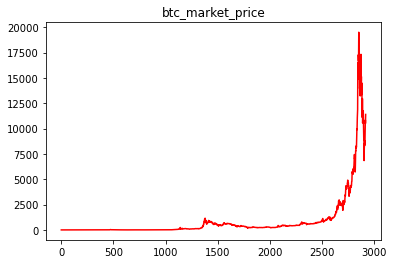

In [669]:
bitcoin.btc_market_price.plot(color='red')
plt.title('btc_market_price')

Since the outcome variable is highly skewed, it would be a good idea to take log transform or square root of the independent variable in our case. Since we have many zero values for which lof transform would lead to -infinity, hence taking square root would be a good choice.

In [670]:
bitcoin['sqrt_btc_market_price']=np.sqrt(bitcoin['btc_market_price'])
bitcoin=bitcoin.drop(columns=['btc_market_price'])
#bitcoin.head()

### Scaling

Differences in the scales across input variables may increase the difficulty of the problem being modeled. An example of this is that large input values (e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.

Hence, we will scale the bitcoin data (with the exception of Date variable)

In [671]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_bitcoin=pd.DataFrame(scaler.fit_transform(bitcoin.drop(columns=['Date','sqrt_btc_market_price'])))
scaled_bitcoin.columns =list(bitcoin.columns)[1:-1]
scaled_bitcoin['Date']=bitcoin['Date']
scaled_bitcoin['sqrt_btc_market_price']=bitcoin['sqrt_btc_market_price']

### Train and Test Split

In [672]:
scaled_bitcoin['Date'] = pd.to_datetime(scaled_bitcoin['Date'])
train=scaled_bitcoin[scaled_bitcoin['Date']<'2017-01-01 00:00:00']
test=scaled_bitcoin[scaled_bitcoin['Date']>='2017-01-01 00:00:00']

train=train.drop(['Date'], axis=1)
test=test.drop(['Date'], axis=1)

In [673]:
print(train.shape,test.shape,bitcoin.shape)

(2504, 29) (416, 29) (2920, 30)


b.  [20 Points] Model Selection Criterion. Use AIC and BIC criteria to select the best model and report the result from each of them. Use the forward selection for AIC and backward selection for BIC. Report the following mean squared error from **both training and testing data**. 

    * The mean squared error: $n^{-1} \sum_{i}(Y_i - \widehat{Y}_i)^2$
    * Since these quantities can be affected by scaling and transformation, make sure that you **state any modifications applied to the outcome variable**. Compare the training data errors and testing data errors. Which model works better? Provide a summary of your results. 

In [674]:
import statsmodels.formula.api as smf
import pandas.util.testing as tm
import copy

def forward_aic(data, response):
    """Linear model designed by forward selection.
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    
    selected = []
    feature_list=[]
    AIC_values=[]
    
    # Setting the intercept model AIC values
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    current_score, best_new_score = model.aic, model.aic

    
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            
            score = smf.ols(formula, data).fit().aic
            scores_with_candidates.append((score, candidate))
            
        # Descreasing order sorting to get the lowest score popped out
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            feature_list.append(copy.copy(selected))
            AIC_values.append(best_new_score)

    df=pd.DataFrame({'feature_list':feature_list,'AIC_values':AIC_values})  
    display(df)   
    
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [675]:
forward_aic_model=forward_aic(train,'sqrt_btc_market_price')

,feature_list,AIC_values
0,[PastDay3],11923.303269
1,"[PastDay3, btc_total_bitcoins]",9135.368446
2,"[PastDay3, btc_total_bitcoins, btc_miners_reve...",8456.063325
3,"[PastDay3, btc_total_bitcoins, btc_miners_reve...",7958.656353
4,"[PastDay3, btc_total_bitcoins, btc_miners_reve...",7842.200876
5,"[PastDay3, btc_total_bitcoins, btc_miners_reve...",7079.003053
6,"[PastDay3, btc_total_bitcoins, btc_miners_reve...",6830.594058
7,"[PastDay3, btc_total_bitcoins, btc_miners_reve...",6689.653333
8,"[PastDay3, btc_total_bitcoins, btc_miners_reve...",6385.751849
9,"[PastDay3, btc_total_bitcoins, btc_miners_reve...",5664.021089


In [676]:
## Best model as per forward selection as per AIC criterion
forward_aic_model.params

Intercept                               28.056014
PastDay3                                 2.548043
btc_total_bitcoins                      -5.096110
btc_miners_revenue                       0.575720
btc_median_confirmation_time            -0.512899
btc_market_cap                          53.533519
btc_hash_rate                           -4.959079
Year                                    11.829919
Month                                    1.418140
btc_blocks_size                        -57.365150
btc_n_transactions_total                54.091652
btc_cost_per_transaction                 1.946872
btc_n_unique_addresses                   0.841724
btc_transaction_fees                     0.686660
Day                                      0.129507
btc_avg_block_size                       0.635200
btc_estimated_transaction_volume_usd     1.262269
btc_n_transactions_per_block            -0.284150
btc_n_transactions_excluding_popular     0.386802
btc_n_orphaned_blocks                   -0.041095


In [677]:
from sklearn.metrics import mean_squared_error  
train_aic_pred=forward_aic_model.predict(train)
test_aic_pred=forward_aic_model.predict(test)

#train_aic_original=scaler.inverse_transform(train['btc_market_price'])
#test_aic_original=scaler.inverse_transform(test['btc_market_price'])

#train_aic_pred_unscaled=scaler.inverse_transform(train_aic_pred)
#test_aic_pred_unscaled=scaler.inverse_transform(test_aic_pred)

aic_train_error=mean_squared_error(np.square(train['sqrt_btc_market_price']), np.square(train_aic_pred))
aic_test_error= mean_squared_error(np.square(test['sqrt_btc_market_price']), np.square(test_aic_pred))

print("For model selected using forward selection with AIC criterion")
print("Training Error: ",aic_train_error)
print("Testing Error: ",aic_test_error)

For model selected using forward selection with AIC criterion
Training Error:  561.2392834853159
Testing Error:  2291444721.35452


In [678]:
def backward_bic(data, response):
    """Linear model designed by forward selection.
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    
    feature_list=[]
    BIC_values=[]
    
    selected = set(data.columns)
    selected.remove(response)
    
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    current_score, best_new_score = model.bic, model.bic
    
    
    while selected and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            covariates=list(selected)
            covariates.remove(candidate)
   
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(covariates))
            
            score = smf.ols(formula, data).fit().bic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.remove(best_candidate)
            current_score = best_new_score
            feature_list.append(selected)
            BIC_values.append(current_score)
    
    df2=pd.DataFrame({'feature_list':feature_list,'BIC_values':BIC_values})  
    display(df2) 
    
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [679]:
backward_bic_model=backward_bic(train,'sqrt_btc_market_price')

,feature_list,BIC_values
0,"{btc_transaction_fees, Year, btc_hash_rate, bt...",5240.936270
1,"{btc_transaction_fees, Year, btc_hash_rate, bt...",5233.118106
2,"{btc_transaction_fees, Year, btc_hash_rate, bt...",5225.315794
3,"{btc_transaction_fees, Year, btc_hash_rate, bt...",5217.517493
4,"{btc_transaction_fees, Year, btc_hash_rate, bt...",5209.751145
5,"{btc_transaction_fees, Year, btc_hash_rate, bt...",5202.450027
6,"{btc_transaction_fees, Year, btc_hash_rate, bt...",5195.660928
7,"{btc_transaction_fees, Year, btc_hash_rate, bt...",5188.104657
8,"{btc_transaction_fees, Year, btc_hash_rate, bt...",5181.540355
9,"{btc_transaction_fees, Year, btc_hash_rate, bt...",5175.275970


In [680]:
## Best model as per backward selection as per BIC criterion
backward_bic_model.params

Intercept                               28.189325
btc_transaction_fees                     0.700726
Year                                    12.240053
btc_hash_rate                           -4.708658
btc_median_confirmation_time            -0.514851
btc_n_transactions_total                52.925076
btc_n_transactions_excluding_popular     0.423704
btc_n_transactions_per_block            -0.260998
btc_cost_per_transaction                 2.001452
PastDay1                                 2.514212
Day                                      0.133731
btc_avg_block_size                       0.621682
btc_blocks_size                        -56.629558
btc_market_cap                          54.377538
btc_estimated_transaction_volume_usd     1.401812
Month                                    1.468672
btc_n_orphaned_blocks                   -0.043693
btc_n_unique_addresses                   0.836145
btc_total_bitcoins                      -5.313367
dtype: float64

In [681]:
train_bic_pred=backward_bic_model.predict(train)
test_bic_pred=backward_bic_model.predict(test)

bic_train_error=mean_squared_error(np.square(train['sqrt_btc_market_price']), np.square(train_bic_pred))
bic_test_error= mean_squared_error(np.square(test['sqrt_btc_market_price']), np.square(test_bic_pred))

print("For model selected using backward selection with BIC criterion")
print("Training Error: ",bic_train_error)
print("Testing Error: ",bic_test_error)

For model selected using backward selection with BIC criterion
Training Error:  561.2958693084367
Testing Error:  2366784387.9913387


### Summary

The model with lower testing error is the better choice. In the present case the model obtained from forward selection approach using AIC criterion is the better performing one.

c.  [10 Points] Best Subset Selection. Fit the best subset selection to the dataset and report the best model of each model size (up to 7 variables, excluding the intercept) and their prediction errors. Make sure that you simplify your output to only present the essential information. If the algorithm cannot handle this many variables, then consider using just day 1 and 2 information. You can use `leaps` package for subset selection.

In [682]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import itertools
import pandas as pd
from tqdm import tnrange, tqdm_notebook  #Importing tqdm for the progress bar
import statsmodels.formula.api as smf

For computational feasibility, using only limited columns.

In [683]:
small_data=pd.DataFrame(train.iloc[:, [22,23,24,28]])
small_data['PastDay3']=pd.to_numeric(small_data['PastDay3'])
small_data['PastDay2']=pd.to_numeric(small_data['PastDay2'])
small_data['PastDay1']=pd.to_numeric(small_data['PastDay1'])
small_data.head()

,PastDay3,PastDay2,PastDay1,sqrt_btc_market_price
0,-0.372222,-0.371719,-0.371208,0.0
1,-0.372222,-0.371719,-0.371208,0.0
2,-0.372222,-0.371719,-0.371208,0.0
3,-0.372222,-0.371719,-0.371208,0.0
4,-0.372222,-0.371719,-0.371208,0.0


In [684]:
#Initialization variables
y = small_data.sqrt_btc_market_price
X = small_data.drop(columns = ['sqrt_btc_market_price'])
k = 3
MSE, feature_list = [],[]
num_features = []


In [685]:
## Helper function for fitting Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def fit_linear_reg(X,y):
    """Fit linear regression model and return RSS and R squared values"""
    model_k=LinearRegression().fit(X,y)
    pred=model_k.predict(X)
    MSE=mean_squared_error(np.square(y),np.square(pred))* len(y)
    return MSE

In [686]:
import itertools
import pandas as pd
#from tqdm import tqdm_notebook  #Importing tqdm for the progress bar
from tqdm.notebook import trange

for k in trange(1,len(X.columns) + 1, desc = 'Loop...'):
    
        for comb in itertools.combinations(X.columns,k):
            lm=fit_linear_reg(X[list(comb)],y)
            MSE.append(lm)
            num_features.append(len(comb))
            feature_list.append(comb)

df=pd.DataFrame({'number_of_features':num_features,'MSE':MSE,'feature_list':feature_list})  
df

Loop...:   0%|          | 0/3 [00:00<?, ?it/s]

,number_of_features,MSE,feature_list
0,1,2.321219e+07,"(PastDay3,)"
1,1,2.385350e+07,"(PastDay2,)"
2,1,2.492723e+07,"(PastDay1,)"
3,2,2.296916e+07,"(PastDay3, PastDay2)"
4,2,2.268304e+07,"(PastDay3, PastDay1)"
5,2,2.374183e+07,"(PastDay2, PastDay1)"
6,3,2.267516e+07,"(PastDay3, PastDay2, PastDay1)"
